In [17]:
using Images
using JLD
#dir=Dates.format(now(), "yyyy-mm-dd HH:MM:SS")
dir=rand()


@load("grid.jld")

n_grid=55

T=1.9
J=1.0
J_A_A=1
J_B_B=0
J_C_C=1
J_A_B,J_B_A=0,0
J_C_B,J_B_C=0,0
J_C_A,J_A_C=-1,-1
#L=10
#z=1
E_steps=20000000   #number of steps for Equilibrium
L=1000000    #number of steps for zero particle density calculations


include("equilibration.jl")
include("production.jl")


grid,steps=Equilibration(n_grid::Int64,T::Float64,J::Float64,E_steps,J_B_B,J_B_A,J_B_C,J_A_B,J_A_A,J_A_C,J_C_B,J_C_A,J_C_C)
#correlation = Array{Float64}(11,n_grid-1)
print(1)
#for r in 1:n_grid-1
grid,corr=Production(n_grid,grid,T,J,L,J_B_B,J_B_A,J_B_C,J_A_B,J_A_A,J_A_C,J_C_B,J_C_A,J_C_C)
    #correlation[:,r]=corr
#end
print(2)
#correlation=transpose(correlation)
# plot(x=convert(Array,1:convert(Int64,ceil(n_grid/2))-2),y=correlation[:,5],Geom.point,Geom.line)
corr=transpose(corr)

if isdefined(Symbol("grid$n_grid")) == true
    file=jldopen("grid.jld","r+")
    delete!(file,"grid$n_grid")
    write(file,"grid$n_grid",grid)
    close(file)
else
    file=jldopen("grid.jld","r+")
    write(file,"grid$n_grid",grid)
    close(file)
end

mkpath("Data/$n_grid/$dir")
fid=open("Data/$n_grid/$dir/r_corrfunc.dat","w")
writecsv(fid, corr)
close(fid)

save("Data/$n_grid/$dir/grid.png",(grid/2)+0.5)

fid=open("Data/$n_grid/$dir/sys_details.dat","w")
@printf(fid,"%s %s\r\n","Date/Time : ",Dates.format(now(), "yyyy-mm-dd HH:MM:SS"));
@printf(fid,"%s %f\r\n","J=",J);
@printf(fid,"%s %u\r\n","Lattice Size=",n_grid);
@printf(fid,"%s %f\r\n","temperature = ",T);
@printf(fid,"%s %f\r\n","Number of equilibration steps = ",E_steps);
# @printf(fid,"%s %f\r\n","Maximum temperature = ",Tmax);
# @printf(fid,"%s %f\r\n","Increment in temperature = ",Tinc);
# @printf(fid,"%s %u\r\n","No.of Production run = ",P);
@printf(fid,"%s %u\r\n","No.of steps in production run = ",L);
# @printf(fid,"%s\r\n","Data:");
# @printf(fid,"%6s %12s %14s\r\n\r\n","r (distance)","Correlation function","Error");
close(fid)
print("Finished")

12Finished

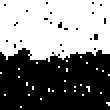

In [19]:
using Colors
Gray.((grid55/2)+0.5)

In [18]:
using JLD
@load("grid.jld")

16-element Array{Symbol,1}:
 :grid10 
 :grid100
 :grid101
 :grid15 
 :grid151
 :grid153
 :grid20 
 :grid200
 :grid201
 :grid25 
 :grid35 
 :grid50 
 :grid500
 :grid55 
 :grid65 
 :grid75 

In [7]:
n_grid=10 
grid=rand(n_grid,n_grid)
    for i in 1:n_grid^2
        if i%2==0
            grid[i]=1
        else 
            grid[i]=-1
        end
    end
    #for i in 1:z
     #  if i%2==0
      #      while true
       #     r_3=rand(2:n_grid-1)
        #    c_3=rand(1:n_grid)
         #   if grid[r_3,c_3]==1
          #      grid[r_3,c_3]=0
           #     break
            #end
            #end
        #else
         #   while true
          #  r_3=rand(2:n_grid-1)
           # c_3=rand(1:n_grid)
    #        if grid[r_3,c_3]==-1
     #           grid[r_3,c_3]=0
      #          break
       #     end
        #    end
        #end 
    #end
    grid[convert(Int,ceil(n_grid/2)),convert(Int,ceil(n_grid/2))]=0

0